<a href="https://colab.research.google.com/github/ronkiks/SALARIES/blob/main/Bank_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

### 1. Proportion of People Who Subscribed to a Term Deposit

In [ ]:
proportion_subscribed = df['deposit'].value_counts(normalize=True)[1]  # Assuming 'yes' represents subscription
print(f"Proportion of people who subscribed to a term deposit: {proportion_subscribed:.2f}")

Proportion of people who subscribed to a term deposit: 0.47


<ipython-input-9-732c33f3c345>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  proportion_subscribed = df['deposit'].value_counts(normalize=True)[1]  # Assuming 'yes' represents subscription


In [ ]:
proportion_subscribed

0.4738398136534671

Documentation:
This value represents the proportion of people in the dataset who subscribed to a term deposit. It was calculated by:
1. Accessing the deposit column in the dataframe (df). This column likely contains a binary indicator for whether a customer subscribed (e.g., "yes" or "no").
2. Using the value_counts() method with normalize=True to calculate the proportion of each unique value in the column.
3. **Selecting** the proportion associated with the value representing subscription (assumed to be 1 or "yes" in this case).

### 2. Correlation between Age and Balance

In [ ]:
correlation = df['age'].corr(df['balance'])
print(f"Correlation between age and balance: {correlation:.2f}")

Correlation between age and balance: 0.11


Documentation:
The value 0.11  represents the correlation coefficient between the 'age' and 'balance' columns in the dataset. It indicates a weak positive linear relationship between a customer's age and their average yearly balance.

### 3. Distribution of the Job Type of the Customers

Distribution of job types:
 job
management       0.229887
blue-collar      0.174162
technician       0.163322
admin.           0.119513
services         0.082691
retired          0.069701
self-employed    0.036284
student          0.032252
unemployed       0.031984
entrepreneur     0.029385
housemaid        0.024548
unknown          0.006271
Name: proportion, dtype: float64


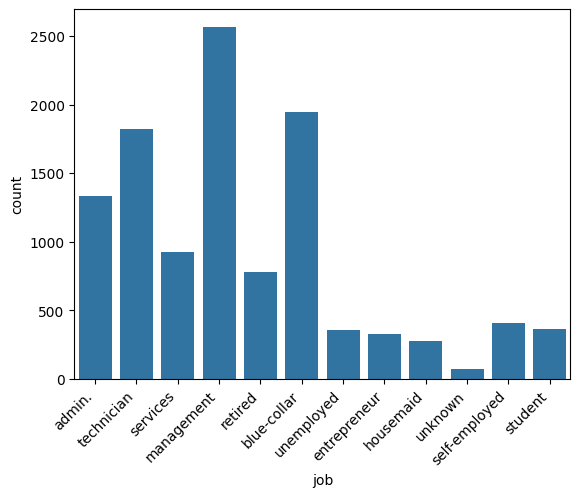

In [ ]:
job_distribution = df['job'].value_counts(normalize=True)
print("Distribution of job types:\n", job_distribution)

# For a visual representation, you can use a bar plot:
sns.countplot(x='job', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

Documentation:
This above distribution shows the
Management: The largest proportion of customers are in management roles.
Blue-collar and Technician: These are the next most frequent job types.
Admin., Services, Retired: These occupations have moderate representation.
Self-employed, Student, Unemployed, Entrepreneur, Housemaid: These job types are less frequent.
Unknown: A small percentage of customers have unknown job types.

### 4. Average Duration of the Calls

In [ ]:
average_duration = df['duration'].mean()
print(f"Average duration of calls: {average_duration:.2f}")

Average duration of calls: 371.99


Documentation:
This value represents the average duration of calls in the dataset, measured in seconds. It indicates that, on average, calls lasted for approximately 371.99 seconds, which is equivalent to about 6 minutes and 12 seconds.

### 5. Proportion of Calls Made Each Month

Proportion of calls made each month:
 month
may    0.253001
aug    0.136087
jul    0.135639
jun    0.109479
nov    0.084483
apr    0.082691
feb    0.069522
oct    0.035119
jan    0.030819
sep    0.028579
mar    0.024727
dec    0.009855
Name: proportion, dtype: float64


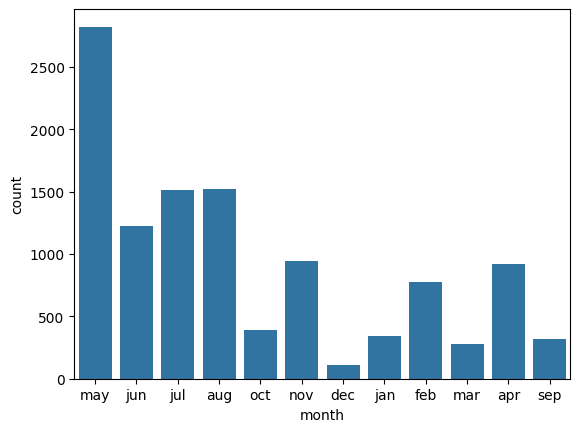

In [ ]:
monthly_calls_proportion = df['month'].value_counts(normalize=True)
print("Proportion of calls made each month:\n", monthly_calls_proportion)

# For a visual representation, you can use a bar plot:
sns.countplot(x='month', data=df)
plt.show()

Documentation:
May, August, July, and June: These months have the highest proportion of calls, suggesting increased marketing activity or customer responsiveness during these periods.
November, April, and February: These months exhibit moderate call volumes.
October, January, September, March, and December: These months have relatively lower proportions of calls, indicating potential seasonal trends or reduced campaign efforts.